<a href="https://colab.research.google.com/github/rafaeldsouza/mestrado-ReconhecimentoPadrao/blob/main/MCAP_Reconhecimento_Padroes_Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aluno:** Rafael de Souza Conceição

**Matéria:**Reconhecimento de Padrões - Francisco de Assis Boldt


**Em um jupyter notebook:**

Carregue uma base de dados de regressão que NÃO esteja nos toy datasets do scikit-learn;

Treine um modelo da classe LinearRegression do scikit-learn com toda a base;

Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

Plote em um gráfico (2D) o MSE em função do atributo intercept_ da classe LinearRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta. O gráfico tem que ser uma parábola com concavidade para cima. Não plote um gráfico 3D com visão de cima.

Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).

#### Baixar dataset do kaggle

In [1]:
!pip install kaggle

**Enviar as credencias do Kaggle**

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


**Baixar dataset**

In [3]:
!kaggle datasets download "merishnasuwal/breast-cancer-prediction-dataset"

breast-cancer-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip breast-cancer-prediction-dataset.zip

Archive:  breast-cancer-prediction-dataset.zip
replace Breast_cancer_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Breast_cancer_data.csv  


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

In [6]:
df = pd.read_csv('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
df.shape

(569, 6)

In [13]:
X = df.iloc[:,0:5] 
y = df.iloc[:,-1]


In [19]:
modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))

0.08263870340194583


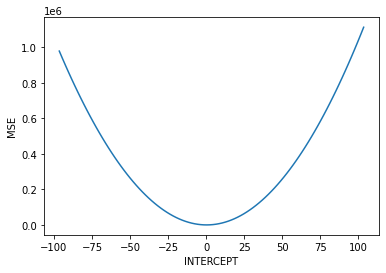

In [21]:
Erro = []
delta = 100
Intercept = np.linspace(modelo.intercept_ - delta,modelo.intercept_ + delta,100)
qtd = len(Intercept)

for i in range(qtd):
    Xpred = Intercept[i] + Intercept[i] * X
    ypred = modelo.predict(Xpred)
    mse = mean_squared_error(y,ypred)
    Erro.append(mse)

plt.ylabel("MSE")
plt.xlabel("INTERCEPT")
plt.plot(Intercept,Erro)
plt.show()